In [1]:
#comencemos importando todas las librerias
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
titanic=pd.read_csv('train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.shape

(891, 12)

In [4]:
#Las features de PassengerId y Name no aportan información de utilidad al modelo
#ahora analicemos las variables de Ticket y Cabin que de principio no parecen tener información importante
titanic['Ticket'].value_counts()

347082                7
CA. 2343              7
1601                  7
CA 2144               6
347088                6
                     ..
243880                1
693                   1
SOTON/O.Q. 3101306    1
237565                1
17764                 1
Name: Ticket, Length: 681, dtype: int64

In [5]:
titanic['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
C22 C26        3
F33            3
              ..
B78            1
B71            1
B3             1
A5             1
B73            1
Name: Cabin, Length: 147, dtype: int64

In [6]:
print('porcentaje de datos faltantes en la columna Cabin')
(titanic['Cabin'].isna().sum())/(titanic.shape[0])

porcentaje de datos faltantes en la columna Cabin


0.7710437710437711

In [7]:
#Por la estructura de datos de ticket y por la cantidad de datos faltantes de la comluna Cabin, lo mejor sería sacarlos del modelo
dataframe=titanic.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)
dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
dataframe.shape

(891, 8)

In [19]:
#Ahora veamos que valores distintos tienen las variables "categoricas" (hay 2 numericas pero con pocos valores) del dataframe
for columna in dataframe.columns:
    if (columna != "Age") and (columna != "Fare"):
      print('los valores distintos de la variable {} son: \n{}'.format(columna, dataframe[columna].value_counts()))

los valores distintos de la variable Survived son: 
0    549
1    342
Name: Survived, dtype: int64
los valores distintos de la variable Pclass son: 
3    491
1    216
2    184
Name: Pclass, dtype: int64
los valores distintos de la variable Sex son: 
male      577
female    314
Name: Sex, dtype: int64
los valores distintos de la variable SibSp son: 
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
los valores distintos de la variable Parch son: 
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
los valores distintos de la variable Embarked son: 
S    644
C    168
Q     77
Name: Embarked, dtype: int64


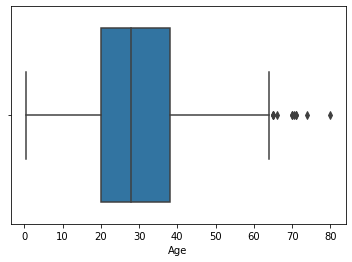

In [20]:
#Ahora observemos las variables numericas Age y Fare
import matplotlib.pyplot as plt
sns.boxplot( x=dataframe['Age'] );
plt.show()

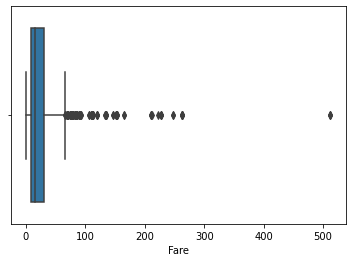

In [21]:
import matplotlib.pyplot as plt
sns.boxplot( x=dataframe['Fare'] );
plt.show()

In [22]:
#Ahora observemos cuantos datos faltantes tenemos por categoria
for columna in dataframe.columns:
  print('los datos faltantes para {} son: {}'.format(columna, dataframe[columna].isna().sum()))

los datos faltantes para Survived son: 0
los datos faltantes para Pclass son: 0
los datos faltantes para Sex son: 0
los datos faltantes para Age son: 177
los datos faltantes para SibSp son: 0
los datos faltantes para Parch son: 0
los datos faltantes para Fare son: 0
los datos faltantes para Embarked son: 2


In [23]:
#Usaremos Imputer para tratar los datos faltantes
from sklearn.impute import SimpleImputer
cat_imp=SimpleImputer(strategy='most_frequent')
num_imp=SimpleImputer(strategy='mean')
dataframe['Embarked']=cat_imp.fit_transform(dataframe[['Embarked']])
dataframe['Age']=num_imp.fit_transform(dataframe[['Age']])
dataframe.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [24]:
#Codifiquemos las variables Embarked y Sex para que pueda interpretarlas el modelo
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder=LabelEncoder()
dataframe['Sex']=label_encoder.fit_transform(dataframe['Sex'])
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(dataframe[['Embarked']]).toarray())

In [25]:
dataframe['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

In [31]:
for i, item in enumerate(label_encoder.classes_):
  print(item, "-->", i)

female --> 0
male --> 1


In [32]:
enc_df.head()

,0,1,2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [ ]:
#hagamos el join con el one hot encoding para tener el dataset casi listo
dataframe=dataframe.drop(['Embarked','Cabin'], axis=1)

In [45]:
dataframe.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2
438,0,1,1,64.000000,1,4,263.0000,S,0.0,0.0,1.0
653,1,3,0,29.699118,0,0,7.8292,Q,0.0,1.0,0.0
590,0,3,1,35.000000,0,0,7.1250,S,0.0,0.0,1.0
310,1,1,0,24.000000,0,0,83.1583,C,1.0,0.0,0.0
492,0,1,1,55.000000,0,0,30.5000,S,0.0,0.0,1.0


In [47]:
#Nos deshacemos de embarked que ta esta representada en el one hot encoding
dataframe=dataframe.drop('Embarked', axis=1)
dataframe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [49]:
#Separemos el target de los features para realizar el entrenamiento de los modelos
X=dataframe.drop('Survived',axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2
0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,3,1,35.0,0,0,8.0500,0.0,0.0,1.0


In [50]:
y=dataframe['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Entrenemos distintos modelos de clasificación

In [51]:
# ranfom forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
rf=RandomForestClassifier() #instanciamos el modelo

In [52]:
#Como lo estoy tratando como black-box hare una grilla de parametros
#Numero de arboles en random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
#Numero de features a considerar en cada split
max_features = ['auto', 'sqrt']
#numero de niveles maximo en el arbol
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [53]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [54]:
rf_random = RandomizedSearchCV(rf, random_grid, n_iter =10, cv=10)

In [55]:
rf_random.fit(X,y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [56]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 1200}

In [57]:
rf_random.best_score_

0.8350686641697879

In [58]:
#ahora entrenemos un svm
from sklearn import svm
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 
              'gamma' : gammas}

In [59]:
svm_random=RandomizedSearchCV(svm.SVC(kernel='rbf'), param_grid, n_iter=10, cv=5)

In [60]:
svm_random.fit(X,y)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10],
                                        'gamma': [0.001, 0.01, 0.1, 1]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [61]:
svm_random.best_score_

0.7015378821166279

In [ ]:
#aAhora probemos la regresión logística
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LRparam_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'max_iter': list(range(100,800,100)),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}
LR_search = RandomizedSearchCV(LR, LRparam_grid, n_iter=10, cv=5)
LR_search.fit(X , y)

In [63]:
LR_search.best_score_

0.7968363567886512

Sin duda el mejor algoritmo que obtuvimos fue Random Forest que usaremos para predecir los datos del reto de kaggle.

Nota: Realice otro ejercicio donde usaba incluia la columna cabin pero me bajo el score :( 

In [64]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [65]:
#Realizaremos la misma limpieza que con los datos de entrenamiento para los datos de test y asi sacar las predicciones
test_data=test.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [66]:
test_data.shape

(418, 7)

In [68]:
test_data.isna().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [70]:
test_data['Sex'].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [71]:
#para las variables que usaremos Encoders no hay datos faltantes asi que podemos empezar. Usaremos los enconders ya fiteados
#para que todo coincida
test_data['Sex']=label_encoder.transform(test_data['Sex'])
enc_test = pd.DataFrame(enc.transform(test_data[['Embarked']]).toarray())

In [72]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [73]:
enc_test.head()

,0,1,2
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,1.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [76]:
#ahora debemos hacer el join y un drop de Embarked
test_data=test_data.join(enc_test)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2
0,3,1,34.5,0,0,7.8292,Q,0.0,1.0,0.0
1,3,0,47.0,1,0,7.0000,S,0.0,0.0,1.0
2,2,1,62.0,0,0,9.6875,Q,0.0,1.0,0.0
3,3,1,27.0,0,0,8.6625,S,0.0,0.0,1.0
4,3,0,22.0,1,1,12.2875,S,0.0,0.0,1.0


In [77]:
test_data.drop('Embarked',axis=1,inplace=True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,0,1,2
0,3,1,34.5,0,0,7.8292,0.0,1.0,0.0
1,3,0,47.0,1,0,7.0000,0.0,0.0,1.0
2,2,1,62.0,0,0,9.6875,0.0,1.0,0.0
3,3,1,27.0,0,0,8.6625,0.0,0.0,1.0
4,3,0,22.0,1,1,12.2875,0.0,0.0,1.0


In [78]:
#ahora los datos que faltan son de Age y Fare, los trataremos con imputer uno con la media y otro con la mediana
#por la distribucion de los datos
fare_imp=SimpleImputer(strategy='median')
test_data['Fare']=fare_imp.fit_transform(test_data[['Fare']])
test_data['Age']=num_imp.fit_transform(test_data[['Age']])
test_data.isna().sum()

Pclass    0
Sex       0
Age       0
SibSp     0
Parch     0
Fare      0
0         0
1         0
2         0
dtype: int64

In [89]:
test_data.shape

(418, 9)

In [90]:
#hagamos nuestras predicciones
rf_random.predict(test_data)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [91]:
#añadamos este resultado al df original para poder emparejar Id y Survived
test['Survived']=rf_random.predict(test_data)

In [92]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [93]:
resultado=test[['PassengerId','Survived']]
resultado.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [94]:
resultado.to_csv('pediccion_titanic.csv')

Ahora ya podemos subir este archivo csv a la competencia del Titanic en Kaggle